<h2>Boson Contrast enhancement</h2>

In [57]:
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
%matplotlib inline

(<matplotlib.image.AxesImage at 0x2481b208320>, Text(0.5, 1.0, 'Original'))

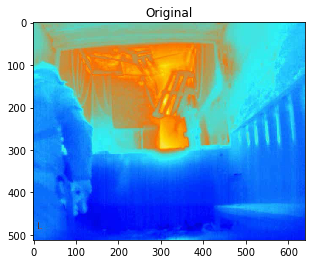

In [58]:
#plot Original
img_loc = (r'C:\Users\A8DPDZZ\Documents\Test Development\ImgAnalysis\bos\Boson_Burn2C_Frames\frame69.jpg')
img = Image.open(img_loc)
plt.imshow(img),plt.title('Original')

(<matplotlib.image.AxesImage at 0x2481cd40d30>,
 Text(0.5, 1.0, 'Contrast Enhance-1.5x'))

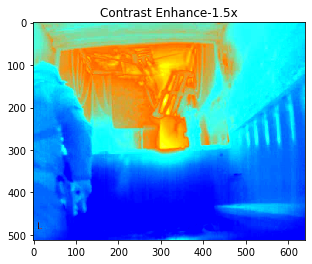

In [59]:
#contrast Enhance
enhancer = ImageEnhance.Contrast(img)
enhanced_im = enhancer.enhance(1.5)
plt.imshow(enhanced_im),plt.title('Contrast Enhance-1.5x')

(<matplotlib.image.AxesImage at 0x2481cd98e48>,
 Text(0.5, 1.0, 'Sharpness Enhance-3x'))

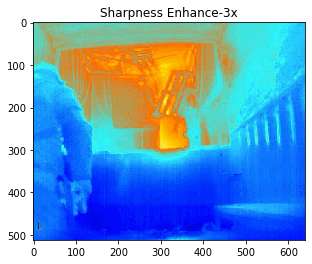

In [60]:
#Sharpness increase original
sharpo_enhance = ImageEnhance.Sharpness(img)
enhanced_im_s = sharpo_enhance.enhance(3.0)
plt.imshow(enhanced_im_s),plt.title('Sharpness Enhance-3x')

(<matplotlib.image.AxesImage at 0x248194797b8>,
 Text(0.5, 1.0, 'Sharpness Enhance-3x & Contrast-1.5x'))

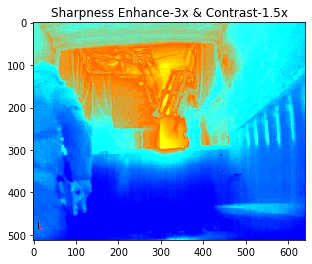

In [61]:
#Sharpness increase original
total_enhance = ImageEnhance.Sharpness(enhanced_im)
total_im = total_enhance.enhance(3.0)
plt.imshow(total_im),plt.title('Sharpness Enhance-3x & Contrast-1.5x')

<h2>Convert PIL image to array</h2>

In [62]:
#Array of Contrast and Sharpness enhanced image
new_arry = np.array(total_im)

In [63]:
new_arry.shape

(512, 640, 3)

In [64]:
#comps = np.concatenate((new_arry,new_can_img), axis=2)
#comp1 = np.reshape(comps,)

<h3>Plot of various enhaced images using original</h3>

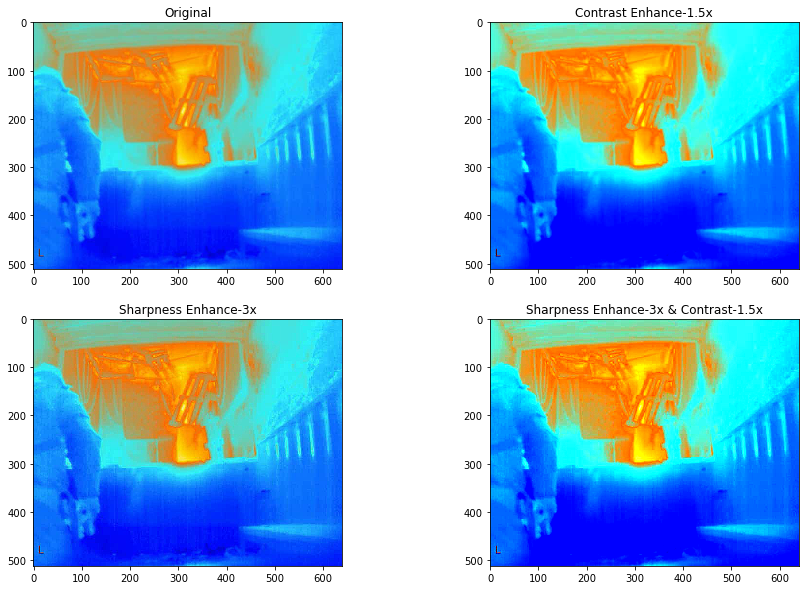

In [65]:
fig, ax = plt.subplots(2,2, figsize =(15,10))
plt.subplot(2,2,1), plt.imshow(img),plt.title('Original')
plt.subplot(2,2,2), plt.imshow(enhanced_im),plt.title('Contrast Enhance-1.5x')
plt.subplot(2,2,3), plt.imshow(enhanced_im_s),plt.title('Sharpness Enhance-3x')
plt.subplot(2,2,4), plt.imshow(total_im),plt.title('Sharpness Enhance-3x & Contrast-1.5x')
plt.show()

In [66]:
#Kernal to find edges on final enhanced image 
ed_img_or = img.filter(ImageFilter.FIND_EDGES)
ed_img_srp = enhanced_im_s.filter(ImageFilter.FIND_EDGES)
ed_img_tot = total_im.filter(ImageFilter.FIND_EDGES)
#ed_img_tot.show()

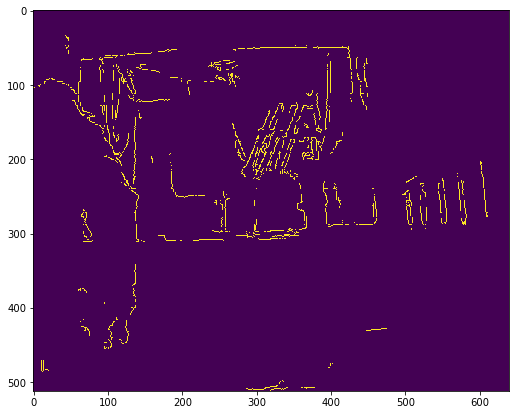

In [85]:
fig, ax = plt.subplots(1,1, figsize =(10,7))
new_loc = (r'C:\Users\A8DPDZZ\Documents\Test Development\ImgAnalysis\bos\Boson_Burn2C_Frames\frame69.jpg') #create new variable for same image
new_img = cv.imread(new_loc) #Remove conversion to greyscale
can_img = cv.Canny(new_img, 100, 200)
plt.imshow(can_img)

In [86]:
#convert image back to BGR with canny 
can_img.dtype
can_img.shape

(512, 640)

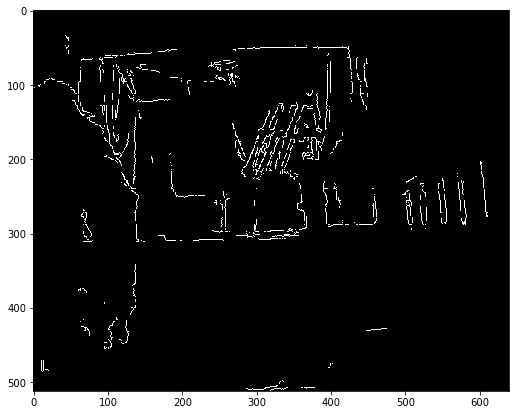

In [87]:
fig, ax = plt.subplots(1,1, figsize =(10,7))
new_can_img = cv.cvtColor(can_img, cv.COLOR_GRAY2BGR)
plt.imshow(new_can_img)

In [88]:
#shape of canny edge detection image
new_can_img.shape

(512, 640, 3)

In [89]:
#blend image onto original using addWeighted
merg_img = cv.addWeighted(new_img,1.0,new_can_img,0.9,3)

In [90]:
print("Edge image:",can_img.shape, "Original image:",new_img.shape)

Edge image: (512, 640) Original image: (512, 640, 3)


<h2>Merged Image of Canny and Original</h2>

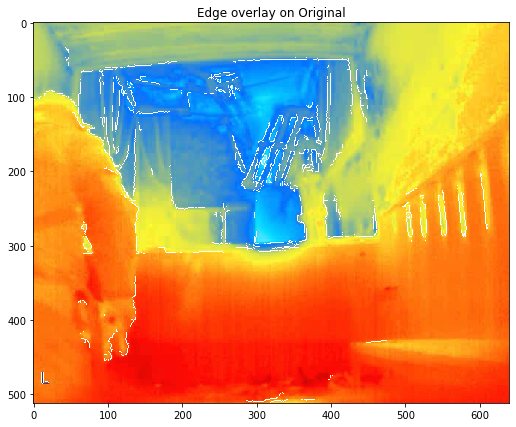

In [91]:
fig, ax = plt.subplots(1,1, figsize =(10,7))
plt.title('Edge overlay on Original')
plt.imshow(merg_img)